In [ ]:
# wczytanie potrzebnych bibliotek
import tensorflow as tf
 
#wczytanie danych 
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_val, y_val) = mnist.load_data()
 
print(f'Zbiór uczący: {X_train.shape}, zbiór walidacyjny: {X_val.shape}')

Zbiór uczący: (60000, 28, 28), zbiór walidacyjny: (10000, 28, 28)


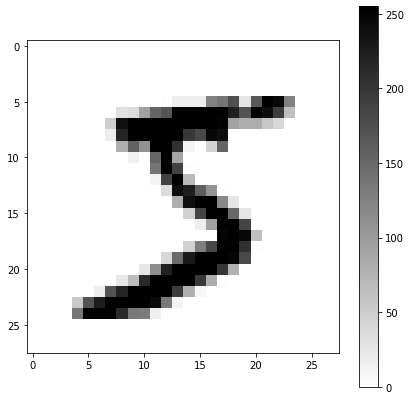

In [ ]:
import matplotlib.pyplot as plt
 
# wyświetlenie pierwszego przykladowego obrazu z zaciagnietych danych
plt.figure(figsize=(7,7))
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()
#każdemu pikselowi odpowiada konretny odcień szarości zakodowany w wartosciach 0-255 

In [ ]:
#wyświetlenie wszytskich danych o pobranym zbiorze
import tensorflow_datasets as tfds
ds, info = tfds.load('mnist', with_info=True)
builder = tfds.builder('mnist')
info = builder.info
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



In [ ]:
#przygotowanie danych, normalizacja
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

#kodowanie One Hot
from tensorflow.keras.utils import to_categorical
 
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#architektura sekwencyjna warstw wej., ukrytych i wyj.
from tensorflow.keras.models import Sequential 
model = Sequential()

#Splaszczamy 28x28 do 784x1
from tensorflow.keras.layers import Flatten, add
model.add(Flatten(input_shape=(28, 28)))

#Zwraca wartość if x>0 lub zero
from tensorflow.keras.layers import Dense 
model.add(Dense(128, activation='relu'))

#wartwa wyj. 10 - bo tyle chcemy przewidziec klas, a softmax, bo jest to klasyfikacja wielowymiarowa
model.add(Dense(10, activation = 'softmax'))

In [ ]:
#Kompilacja modelu

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Trenowanie modelu
history = model.fit(X_train, 
                    y_train, 
                    epochs=10,
                    verbose=1,
                    batch_size = 256,
                    validation_data = (X_val, y_val)
                   )

Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.7726 - accuracy: 0.7952 - val_loss: 0.2259 - val_accuracy: 0.9378
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2076 - accuracy: 0.9427 - val_loss: 0.1640 - val_accuracy: 0.9540
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1495 - accuracy: 0.9586 - val_loss: 0.1289 - val_accuracy: 0.9630
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1114 - accuracy: 0.9690 - val_loss: 0.1145 - val_accuracy: 0.9666
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0961 - accuracy: 0.9726 - val_loss: 0.1050 - val_accuracy: 0.9701
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0824 - accuracy: 0.9767 - val_loss: 0.0933 - val_accuracy: 0.9725
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0686 - accuracy: 0.9811 - val_loss: 0.0898 - val_accuracy: 0.9723
Epoch 

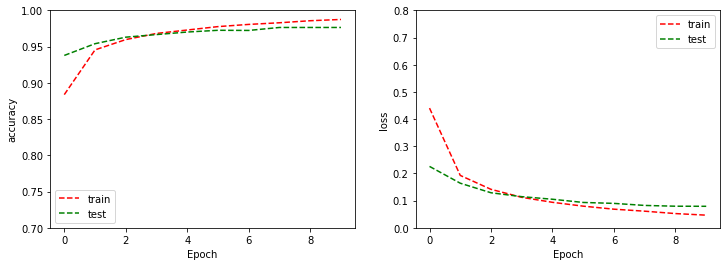

In [ ]:
#wizualizacja trenowania
def draw_curves(history, key1='accuracy', ylim1=(0.8, 1.00), 
                key2='loss', ylim2=(0.0, 1.0)):
    plt.figure(figsize=(12,4))
     
    plt.subplot(1, 2, 1)
    plt.plot(history.history[key1], "r--")
    plt.plot(history.history['val_' + key1], "g--")
    plt.ylabel(key1)
    plt.xlabel('Epoch')
    plt.ylim(ylim1)
    plt.legend(['train', 'test'], loc='best')
 
    plt.subplot(1, 2, 2)
    plt.plot(history.history[key2], "r--")
    plt.plot(history.history['val_' + key2], "g--")
    plt.ylabel(key2)
    plt.xlabel('Epoch')
    plt.ylim(ylim2)
    plt.legend(['train', 'test'], loc='best')
     
    plt.show()
     
draw_curves(history, key1='accuracy', ylim1=(0.7, 1.0), 
            key2='loss', ylim2=(0.0, 0.8))

In [ ]:
#Ocena modelu na danych testowych
results = model.evaluate(X_val, y_val, batch_size=128)
print("test loss, test acc:", results)

79/79 [==============================] - 0s 2ms/step - loss: 0.0791 - accuracy: 0.9764
test loss, test acc: [0.07911305874586105, 0.9764000177383423]


In [ ]:

#predykcja => prawdopodobieństwo wyniku na wyj. ostatniej warstwy
#dla 3 próbek
predictions = model.predict(X_val[:3])
print("predictions shape:", predictions.shape)

predictions shape: (3, 10)
